# 코로나 데이터 분석
- 정부 정책에 따라 코로나 사태로 인한 대응으로 해외 입국자를 거절했던 (대만, 호주) 의 일일 확진자 수와 해외입국자를 받아드리는 대한민국의 일일확진자 수를 분석해 보고자 한다. 
- 대만, 베트남 , 뉴질랜드 : 지속적인 해외입국 금지 정책
- 대한 민국 : 허가

- 데이터 출처 : 캐글

In [2]:
import pandas as pd
import numpy as np

import webbrowser
import requests
from bs4 import BeautifulSoup 
import matplotlib.pyplot as plt
import matplotlib

matplotlib.rcParams['font.family']='Malgun Gothic'
matplotlib.rcParams['axes.unicode_minus']='False'  #한글 쓸수 있게 설정 

In [5]:
filepath = r"C:\Users\student\2020_python\0729_Data_project\world_covid\covid_19_data.csv" #데이터 파일 불러오기 출처 : 캐글

world_covid_df=pd.read_csv(filepath)
world_covid_df

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
68553,68554,07/20/2020,Zaporizhia Oblast,Ukraine,2020-07-21 04:38:46,678.0,20.0,551.0
68554,68555,07/20/2020,Zeeland,Netherlands,2020-07-21 04:38:46,791.0,69.0,0.0
68555,68556,07/20/2020,Zhejiang,Mainland China,2020-07-21 04:38:46,1270.0,1.0,1267.0
68556,68557,07/20/2020,Zhytomyr Oblast,Ukraine,2020-07-21 04:38:46,1602.0,34.0,1251.0


#### 데이터 파일에서 대한민국, 대만, 뉴질랜드, 베트남 데이터 프레임 추출하기 & 일일확진자 수 계산해서 데이터 프레임에 추가

In [6]:
# 대만 추출하기 
taiwan_df=world_covid_df['Country/Region']=='Taiwan'

taiwan_covid_df=world_covid_df[taiwan_df]
taiwan_covid_df=taiwan_covid_df[['ObservationDate', 'Country/Region', 'Confirmed']]   # 대만 확진자 정보를 담은 데이터 프레임

taiwan_covid=taiwan_covid_df.copy() # 깊은 복사를 해줘야지 데이터 프레임 형식으로 지정된다.
taiwan_covid['Day_Confirmed']=0  # 일일 확진자 수를 저장하기 위한 새로운 컬럼 생성
taiwan_covid=taiwan_covid.groupby(['ObservationDate','Country/Region'],as_index=False).sum()

confirmed_list=taiwan_covid[['Confirmed']]

one_list=[] # 일일 확진자 정보를 담는 리스트
for i in range(1,len(confirmed_list)):
    rest= int(taiwan_covid.loc[i]['Confirmed']-taiwan_covid.loc[i-1]['Confirmed'])
    one_list.append(rest)
one_list.insert(0,taiwan_covid.loc[0]['Day_Confirmed'])

taiwan_covid['Day_Confirmed']=one_list
taiwan_covid

,ObservationDate,Country/Region,Confirmed,Day_Confirmed
0,01/22/2020,Taiwan,1.0,0
1,01/23/2020,Taiwan,1.0,0
2,01/24/2020,Taiwan,3.0,2
3,01/25/2020,Taiwan,3.0,0
4,01/26/2020,Taiwan,4.0,1
...,...,...,...,...
176,07/16/2020,Taiwan,451.0,0
177,07/17/2020,Taiwan,451.0,0
178,07/18/2020,Taiwan,451.0,0
179,07/19/2020,Taiwan,451.0,0


In [7]:
viet_df=world_covid_df['Country/Region']=='Vietnam'

viet_covid_df=world_covid_df[viet_df]
viet_covid_df=viet_covid_df[['ObservationDate', 'Country/Region', 'Confirmed']]   # 베트남 확진자 정보를 담은 데이터 프레임

viet_covid=viet_covid_df.copy()
viet_covid['Day_Confirmed']=0
viet_covid=viet_covid.groupby(['ObservationDate','Country/Region'],as_index=False).sum()

confirmed_list=viet_covid[['Confirmed']]

one_list=[]
for i in range(1,len(confirmed_list)):
    rest= int(viet_covid.loc[i]['Confirmed']-viet_covid.loc[i-1]['Confirmed'])
    one_list.append(rest)
one_list.insert(0,viet_covid.loc[0]['Day_Confirmed'])

viet_covid['Day_Confirmed']=one_list
viet_covid

,ObservationDate,Country/Region,Confirmed,Day_Confirmed
0,01/23/2020,Vietnam,2.0,0
1,01/24/2020,Vietnam,2.0,0
2,01/25/2020,Vietnam,2.0,0
3,01/26/2020,Vietnam,2.0,0
4,01/27/2020,Vietnam,2.0,0
...,...,...,...,...
175,07/16/2020,Vietnam,381.0,0
176,07/17/2020,Vietnam,382.0,1
177,07/18/2020,Vietnam,382.0,0
178,07/19/2020,Vietnam,383.0,1


In [8]:
korea_df=world_covid_df['Country/Region']=='South Korea'

korea_covid_df=world_covid_df[korea_df]
korea_covid_df=korea_covid_df[['ObservationDate', 'Country/Region', 'Confirmed']]   # 대한민국 확진자 정보를 담은 데이터 프레임

korea_covid=korea_covid_df.copy()
korea_covid['Day_Confirmed']=0
korea_covid=korea_covid.groupby(['ObservationDate','Country/Region'],as_index=False).sum()

confirmed_list=korea_covid[['Confirmed']]

one_list=[]
for i in range(1,len(confirmed_list)):
    rest= abs(korea_covid.loc[i]['Confirmed']-korea_covid.loc[i-1]['Confirmed'])
    one_list.append(rest)
one_list.insert(0,korea_covid.loc[0]['Day_Confirmed'])

korea_covid['Day_Confirmed']=one_list

korea_covid

,ObservationDate,Country/Region,Confirmed,Day_Confirmed
0,01/22/2020,South Korea,1.0,0.0
1,01/23/2020,South Korea,1.0,0.0
2,01/24/2020,South Korea,2.0,1.0
3,01/25/2020,South Korea,2.0,0.0
4,01/26/2020,South Korea,3.0,1.0
...,...,...,...,...
176,07/16/2020,South Korea,13672.0,60.0
177,07/17/2020,South Korea,13711.0,39.0
178,07/18/2020,South Korea,13745.0,34.0
179,07/19/2020,South Korea,13771.0,26.0


In [9]:
new_df=world_covid_df['Country/Region']=='New Zealand'

new_covid_df=world_covid_df[new_df]
new_covid_df=new_covid_df[['ObservationDate', 'Country/Region', 'Confirmed']]   # 뉴질랜드 확진자 정보를 담은 데이터 프레임

new_covid=new_covid_df.copy()
new_covid['Day_Confirmed']=0
new_covid=new_covid.groupby(['ObservationDate','Country/Region'],as_index=False).sum()

confirmed_list=new_covid[['Confirmed']]

one_list=[]
for i in range(1,len(confirmed_list)):
    rest= int(new_covid.loc[i]['Confirmed']-new_covid.loc[i-1]['Confirmed'])
    one_list.append(rest)
one_list.insert(0,new_covid.loc[0]['Day_Confirmed'])

new_covid['Day_Confirmed']=one_list

new_covid

,ObservationDate,Country/Region,Confirmed,Day_Confirmed
0,02/28/2020,New Zealand,1.0,0
1,02/29/2020,New Zealand,1.0,0
2,03/01/2020,New Zealand,1.0,0
3,03/02/2020,New Zealand,1.0,0
4,03/03/2020,New Zealand,1.0,0
...,...,...,...,...
139,07/16/2020,New Zealand,1549.0,1
140,07/17/2020,New Zealand,1550.0,1
141,07/18/2020,New Zealand,1553.0,3
142,07/19/2020,New Zealand,1554.0,1


### 일일 확진자 비교 그래프 (기간 : 2020/01/22~2020/07/20)

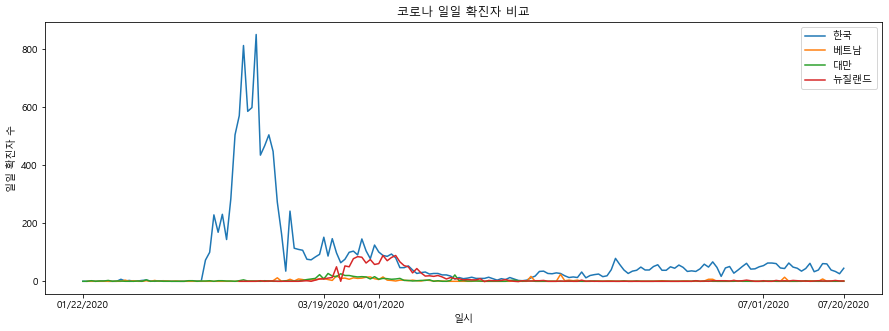

In [47]:
#일일 확진자 비교 그래프 

ax = plt.subplot()
plt.rcParams['figure.figsize'] = [15, 5]
plt.plot(korea_covid['ObservationDate'],korea_covid['Day_Confirmed'])
plt.plot(viet_covid['ObservationDate'],viet_covid['Day_Confirmed'])
plt.plot(taiwan_covid['ObservationDate'],taiwan_covid['Day_Confirmed'])
plt.plot(new_covid['ObservationDate'],new_covid['Day_Confirmed'])
plt.xlabel('일시')
plt.ylabel('일일 확진자 수')
plt.title("코로나 일일 확진자 비교")
plt.legend(["한국","베트남","대만","뉴질랜드"])

ax.set_xticks(['01/22/2020','03/19/2020','04/01/2020', '07/01/2020', '07/20/2020'])

plt.show()

### 일일 확진자 비교 그래프 (기간 : 2020/04/01~2020/07/20)
- 각 나라별 데이터의 차이를 더 잘 확인하기 위하여 입국 금지 정책이 시행된 03/19 일을 기준으로 자가격리 기간을 고려하여 10일 후인 04/01 이후의 일일 확진자 수를 보여주고자 한다.)
- 그래프 해석 결과, 해외 입국을 제지하지 않은 대한민국은 peak지점 이후로 내부 방역관리로 확진자 수의 감소를 보이고 있으나, 해외 입국을 제지한 대만, 베트남, 그리고 뉴질랜드 보다는 지속적으로 확진자 수가 나오고 있는 상황이다.

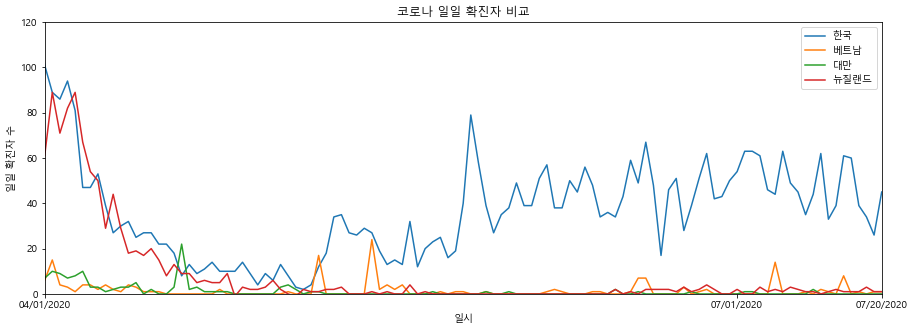

In [51]:
ax = plt.subplot()
plt.rcParams['figure.figsize'] = [15, 5]
plt.plot(korea_covid['ObservationDate'],korea_covid['Day_Confirmed'])
plt.plot(viet_covid['ObservationDate'],viet_covid['Day_Confirmed'])
plt.plot(taiwan_covid['ObservationDate'],taiwan_covid['Day_Confirmed'])
plt.plot(new_covid['ObservationDate'],new_covid['Day_Confirmed'])
plt.xlabel('일시')
plt.ylabel('일일 확진자 수')
plt.title("코로나 일일 확진자 비교")
plt.legend(["한국","베트남","대만","뉴질랜드"])
plt.xlim('04/01/2020', '07/20/2020')
plt.ylim(0, 120)

ax.set_xticks(['04/01/2020', '07/01/2020', '07/20/2020'])

plt.show()

## 입국 금지 정책 시행일자 (20.03.19)
- 3월 19일 이후부터 베트남, 대만,뉴질랜드는 해외 유입을 막기 위해 해외 입국을 전면 금지 하였다. 
- 해외 입국시 자가 격리일 기반하여  20.04.01 이후 부터 지금까지 해외입국이 가능한 대한민국 과 해외입국이 불가능한 베트남 ,대만. 뉴질랜드 의 각 나라 인구수 대비 확진자 비율이 어떠한지 알아보고자 한다. 

In [11]:
# 날짜 기준 인덱스로 변경하기
new_in=new_covid.set_index("ObservationDate")
kor_in=korea_covid.set_index("ObservationDate")
viet_in = viet_covid.set_index("ObservationDate")
tai_in = taiwan_covid.set_index("ObservationDate")

In [12]:
#입국 금지 정책 시행후 약 10일 후(04/01/2020) 부터 확진자 수 파악을 위한 슬라이싱. 
new_in_list=new_in['Day_Confirmed']["04/01/2020":]
kor_in_list=kor_in['Day_Confirmed']["04/01/2020":]
viet_in_list=viet_in['Day_Confirmed']["04/01/2020":]
tai_in_list=tai_in['Day_Confirmed']["04/01/2020":]


In [13]:
# 각 나라의 누적 확진자수 계산

new_total=sum(new_in_list.values)
kor_total=sum(kor_in_list.values)
viet_total=sum(viet_in_list.values)
tai_total=sum(tai_in_list.values)


In [14]:
filepath = r"C:\Users\student\2020_python\0729_Data_project\world_covid\population_by_country_2020.csv" #데이터 파일 불러오기 출처 : 캐글

population_df=pd.read_csv(filepath)
population_df=population_df.set_index("Country (or dependency)")

In [15]:
population_df

,Population (2020),Yearly Change,Net Change,Density (P/Km²),Land Area (Km²),Migrants (net),Fert. Rate,Med. Age,Urban Pop %,World Share
Country (or dependency),,,,,,,,,,
China,1438207241,0.39 %,5540090,153,9388211,-348399.0,1.7,38,61 %,18.47 %
India,1377233523,0.99 %,13586631,464,2973190,-532687.0,2.2,28,35 %,17.70 %
United States,330610570,0.59 %,1937734,36,9147420,954806.0,1.8,38,83 %,4.25 %
Indonesia,272931713,1.07 %,2898047,151,1811570,-98955.0,2.3,30,56 %,3.51 %
Pakistan,219992900,2.00 %,4327022,287,770880,-233379.0,3.6,23,35 %,2.83 %
...,...,...,...,...,...,...,...,...,...,...
Montserrat,4991,0.06 %,3,50,100,NaN,N.A.,N.A.,10 %,0.00 %
Falkland Islands,3458,3.05 %,103,0,12170,NaN,N.A.,N.A.,66 %,0.00 %
Niue,1624,0.68 %,11,6,260,NaN,N.A.,N.A.,46 %,0.00 %


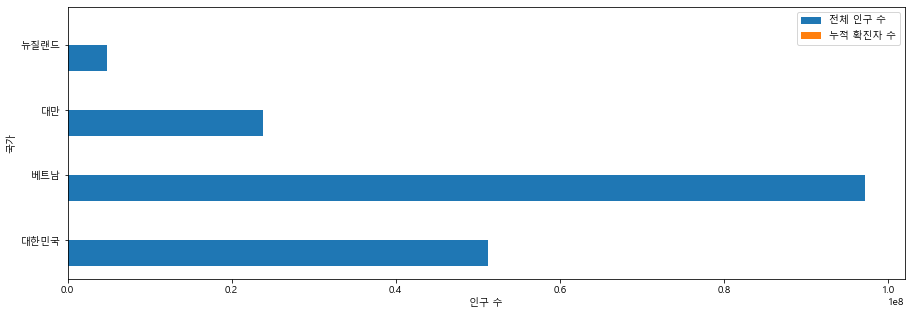

In [57]:
korea_po=population_df.loc["South Korea"]["Population (2020)"]
viet_po=population_df.loc["Vietnam"]["Population (2020)"]
tai_po=population_df.loc["Taiwan"]["Population (2020)"]
new_po=population_df.loc["New Zealand"]["Population (2020)"]

from matplotlib import pyplot

label=["대한민국",'베트남','대만','뉴질랜드']
population=[korea_po,viet_po,tai_po,new_po]
total=[kor_total,viet_total,tai_total,new_total]

pyplot.figure()
y=np.arange(len(label))

pyplot.barh(y-0.2,population,label='전체 인구 수',height=0.4)
pyplot.barh(y+0.2,total,label='누적 확진자 수',height=0.4)
pyplot.yticks(y,label)


pyplot.legend()
pyplot.ylabel("국가")
pyplot.xlabel("인구 수")

plt.show()


    전체 인구수 대비 누적 확진자 수를 같은 그래프로 표현 하려고 하였으나 차이가 커 그래프에 누적환진자 수가 보이지 않았다. 
    따라서 이 두 부분을 나눠서 출력하도록 하겠다 

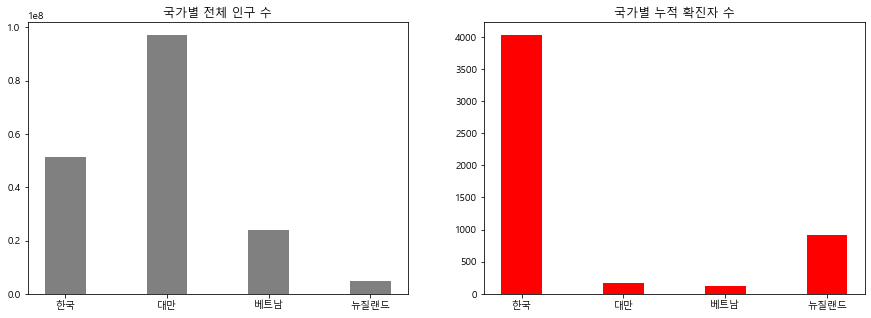

In [58]:
w_ = 0.4

plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
data = population
plt.bar(['한국', '대만', '베트남','뉴질랜드'], data, width=w_,color='gray')
plt.title('국가별 전체 인구 수')

plt.subplot(1,2,2)
data1 = total
plt.bar(['한국', '대만', '베트남','뉴질랜드'], data1, width=w_, color='red')
plt.title('국가별 누적 확진자 수')

plt.show()

    국가별 전체 인구수와 누적 확진자 수를 그래프로 나타내면 다음과 같다.
    국가별 전체 인구 수는 베트남, 한국, 대만  , 뉴질랜드 순으로 많다.
    하지만, 국각별 누적 확진자 수는 한국,뉴질랜드, 대만, 베트남 순이다. 
    이를 통해 해외 유입은 허락하고 있는 한국 누적 환진자 수가 상당한 부분을 차지하고 있는것을 볼 수 있다. 

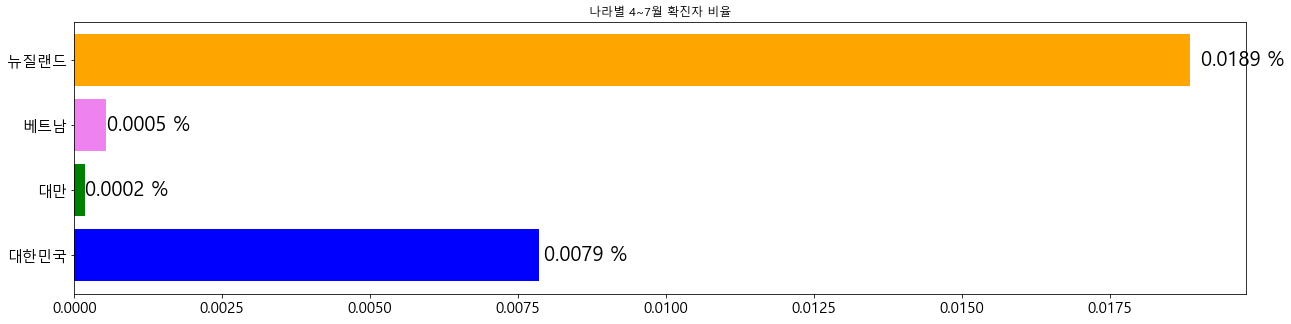

In [56]:
confirmed_rate = []
for i, j in zip(total, population):
    confirmed_rate.append(i/j * 100)
target_list = ['대한민국', '대만', '베트남','뉴질랜드']
plt.figure(figsize=(21, 5))
plt.rc('font', family='Malgun Gothic')
ax = plt.barh(target_list, confirmed_rate, color=['blue', 'green', 'violet','orange'])
plt.title('나라별 4~7월 확진자 비율')
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)

for p in ax.patches:
    x, y, width, height = p.get_bbox().bounds
    plt.text(width*1.01, y+height/2, "%.4f %%"%(width), va='center', fontsize=20)

plt.show()

이를 비율로 나타낸 그래프는 다음과 같다.   
한국 0.0077%
대만 0.0005%
베트남 0.0002%
뉴질랜드 0.018% 